In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy.stats import stats

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_data = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()
student_data.info()
variables = ['math score', 'reading score', 'writing score']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


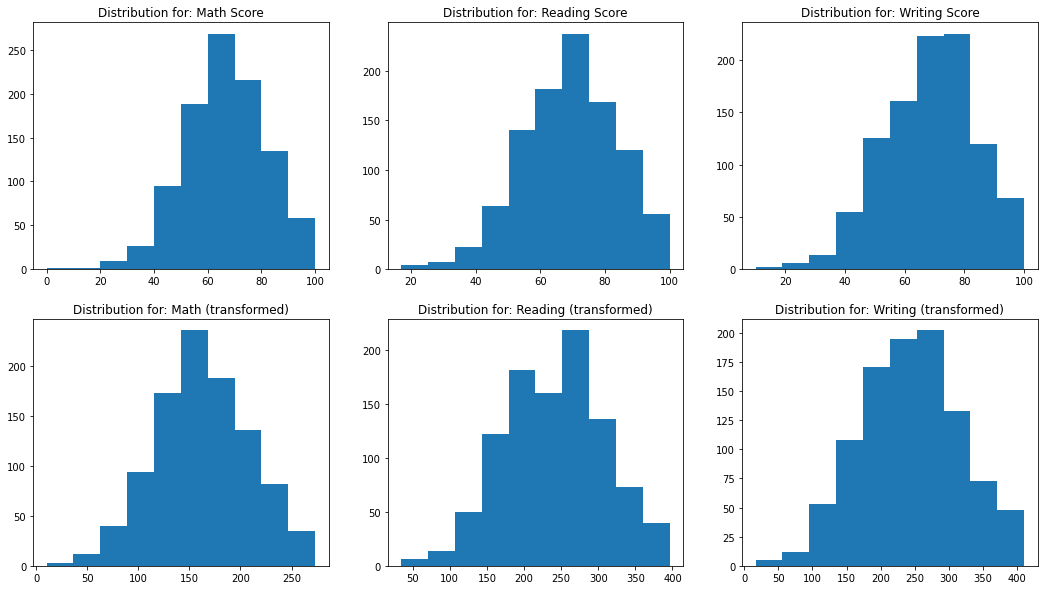

Stats for non-transformed data sets: 
Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974



Stats for boxcox transformed sets
Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043

In [36]:
from scipy.stats import jarque_bera as jb
from scipy.stats import normaltest as nt
from scipy.stats import boxcox

boxcox_math,_ = boxcox(student_data[student_data['math score'] > 0]['math score'])
boxcox_reading,_ = boxcox(student_data['reading score'])
boxcox_writing,_ = boxcox(student_data['writing score'])

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.hist(student_data['math score'])
plt.title('Distribution for: Math Score')

plt.subplot(2,3,2)
plt.hist(student_data['reading score'])
plt.title('Distribution for: Reading Score')

plt.subplot(2,3,3)
plt.hist(student_data['writing score'])
plt.title('Distribution for: Writing Score')

plt.subplot(2,3,4)
plt.hist(boxcox_math)
plt.title('Distribution for: Math (transformed)')

plt.subplot(2,3,5)
plt.hist(boxcox_reading)
plt.title('Distribution for: Reading (transformed)')

plt.subplot(2,3,6)
plt.hist(boxcox_writing)
plt.title('Distribution for: Writing (transformed)')
plt.show()

# They seem to be normally distributed, lets try testing with jarque bera and 
# normal test

print('Stats for non-transformed data sets: ')
jb_stats = jb(student_data['math score'])
norm_stats = nt(student_data['math score'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jb(student_data['reading score'])
norm_stats = nt(student_data['reading score'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jb(student_data['writing score'])
norm_stats = nt(student_data['writing score'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n\n')

'''
So the p values are all less than .05 and the test statistics are very high.
These sets are not perfectly normal, will apply the box-cox transform
'''

print('Stats for boxcox transformed sets')
jb_stats = jb(boxcox_math)
norm_stats = nt(boxcox_math)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jb(boxcox_reading)
norm_stats = nt(boxcox_reading)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jb(boxcox_writing)
norm_stats = nt(boxcox_writing)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


In [0]:
student_data['average test score'] = (student_data['math score'] + student_data['reading score'] + student_data['writing score'])/3
student_data['average test score']

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(student_data['average test score'])
plt.title('Distribution of average exam score')

jb_stats = jb(student_data['average test score'])
norm_stats = nt(student_data['average test score'])

print('Normal Test for average test scores, non transformed')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

boxcox_average_exam,_ = boxcox(student_data['average test score'])

plt.subplot(1,2,2)
plt.hist(boxcox_average_exam)
plt.title('Distribution of average exam score (boxcox)')
plt.show()

print('Normal test for average test scores, transformed')
jb_stats = jb(boxcox_average_exam)
norm_stats = nt(boxcox_average_exam)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average test score           1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


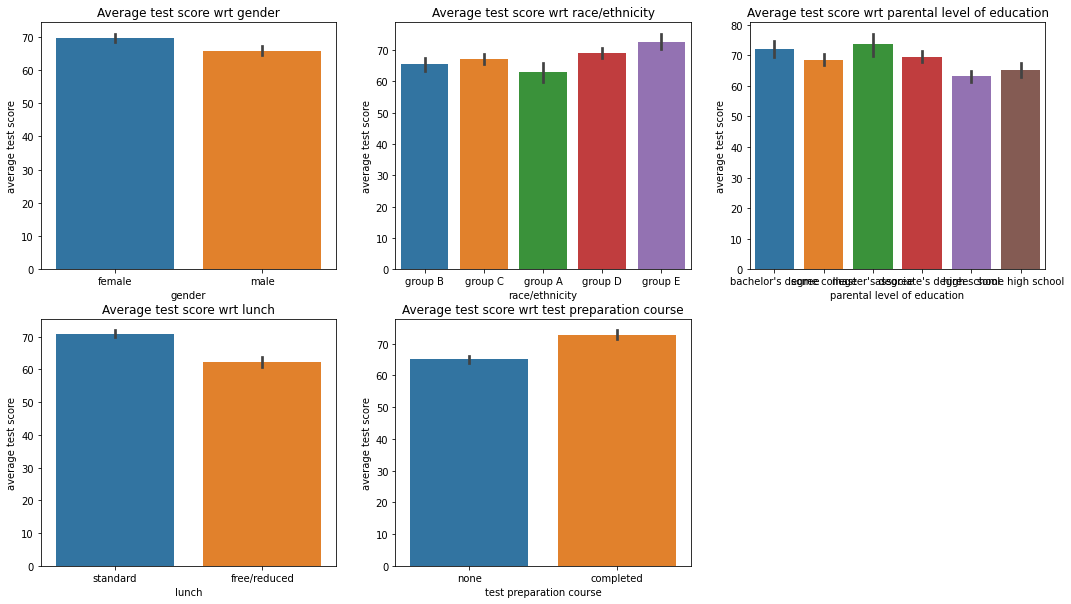

In [65]:
student_data.info()
  

plt.figure(figsize= (18,10))

plt.subplot(2,3,1)
sns.barplot(x='gender', y='average test score', data = student_data)
plt.title('Average test score wrt gender')


plt.subplot(2,3,2)
sns.barplot(x='race/ethnicity', y = 'average test score', data = student_data)
plt.title('Average test score wrt race/ethnicity')

plt.subplot(2,3,3)
sns.barplot(x = 'parental level of education', y = 'average test score', data = student_data)
plt.title('Average test score wrt parental level of education')

plt.subplot(2,3,4)
sns.barplot(x = 'lunch', y = 'average test score', data = student_data)
plt.title('Average test score wrt lunch')

plt.subplot(2,3,5)
sns.barplot(x = 'test preparation course', y = 'average test score', data = student_data)
plt.title('Average test score wrt test preparation course')


plt.show()

